SENTIMENT ANALYSIS WITH NLP

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.8025

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       410
           1       0.77      0.84      0.81       390

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



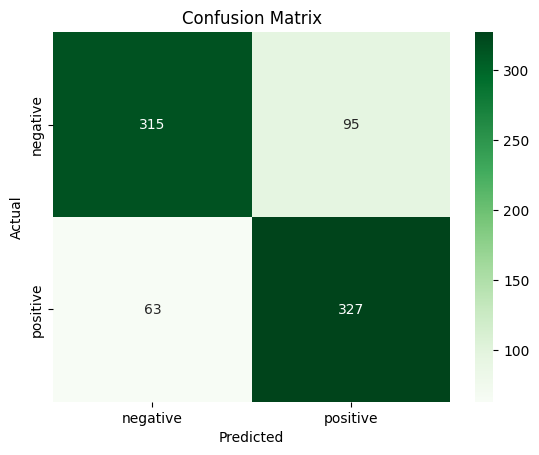

In [ ]:
#import libraries
import nltk
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import WordNetLemmatizer
# Download the movie reviews dataset
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
# creating dataframe
df = pd.DataFrame(documents,columns=['text','sentiment'])
df['sentiment'] = df['sentiment'].map({'pos':1, 'neg':0})
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]","" ,text)#removes punctuation
    text = re.sub(r"\d+","" ,text)#removes numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)
df['cleaned_text']=df['text'].apply(clean_text)
# convert the text to a numeric format
vectorizer=TfidfVectorizer(max_features=5000)
X=vectorizer.fit_transform(df['cleaned_text'])
y=df['sentiment']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.4,random_state=45)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))
print("\nClassification Report:\n",classification_report(y_test, predictions))
#confusion matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens',xticklabels=['negative','positive'],yticklabels=['negative','positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()